!pip install git+https://github.com/lisphilar/covid19-sir#egg=covsirphy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from covsirphy import select_area

In [2]:
linelist_raw = pd.read_csv("COVID19_line_list_data.csv")
df = linelist_raw.loc[:, ~linelist_raw.columns.str.startswith("Unnamed:")]
df = df.drop(["id", "case_in_country", "summary", "source", "link"], axis=1)

# Date
case_date_dict = {
    "reporting date": "Confirmed_date",
    "exposure_start": "Exposed_date",
    "exposure_end": "Quarantined_date",
    "hosp_visit_date": "Hospitalized_date",
    "symptom_onset": "Onset_date",
    "death": "Deaths_date",
    "recovered": "Recovered_date"    
}
df["death"] = df["death"].replace({"0": "", "1": ""})
df["recovered"] = df["recovered"].replace({"0": "", "1": "", "12/30/1899": "12/30/2019"})
for (col, _) in case_date_dict.items():
    df[col] = pd.to_datetime(df[col])
df = df.rename(case_date_dict, axis=1)

# Location
df["Country"] = df["country"].fillna("-")
df["Province"] = df["location"].fillna("-")
df["Province"] = df[["Country", "Province"]].apply(lambda x: "-" if x[0] == x[1] else x[1], axis=1)

# Personal
df["Gender"] = df["gender"].fillna("-").str.capitalize()
df["Age"] = df["age"].fillna(df["age"].median()).astype(np.int64) ## Fill in NA with median
df["From_Wuhan"] = df["from Wuhan"]
df["To_Wuhan"] = df["visiting Wuhan"]

# Medical
df["Events"] = df["symptom"].fillna("-")

# Order of columns
linelist_df = df.loc[
    :,
    [
        "Country", "Province",
        "Exposed_date", "Onset_date", "Hospitalized_date", "Confirmed_date", "Quarantined_date", "Deaths_date", 
        "Recovered_date",
        "Events",
        "Gender", "Age", "From_Wuhan", "To_Wuhan"
    ]
]

In [3]:
#Here is the specific data of this dataset refered to Spain
period_df_spain = select_area(linelist_df, group=None, places=[("Spain", None)])
period_df_spain = period_df_spain.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df_spain["Latent [min]"] = (period_df_spain["Onset_date"] - period_df_spain["Exposed_date"]).dt.total_seconds() / 60
period_df_spain["Waiting [min]"] = (period_df_spain["Confirmed_date"] - period_df_spain["Onset_date"]).dt.total_seconds() / 60
period_df_spain["Latent [day]"] = period_df_spain["Latent [min]"] / 60 / 24
period_df_spain["Waiting [day]"] = period_df_spain["Waiting [min]"] / 60 / 24
period_df_spain["Latent + Waiting [day]"] = period_df_spain["Latent [day]"] + period_df_spain["Waiting [day]"]
period_df_spain

,Exposed_date,Onset_date,Confirmed_date,Latent [min],Waiting [min],Latent [day],Waiting [day],Latent + Waiting [day]
996,NaT,NaT,2020-01-31,NaN,NaN,NaN,NaN,NaN
997,NaT,NaT,2020-02-10,NaN,NaN,NaN,NaN,NaN
998,NaT,NaT,2020-02-24,NaN,NaN,NaN,NaN,NaN
999,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1000,2020-02-12,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1001,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1002,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1003,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN
1004,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN
1005,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN


In [4]:
#We do not filter by country
period_df = select_area(linelist_df, group=None)
period_df = period_df.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df["Latent [min]"] = (period_df["Onset_date"] - period_df["Exposed_date"]).dt.total_seconds() / 60
period_df["Waiting [min]"] = (period_df["Confirmed_date"] - period_df["Onset_date"]).dt.total_seconds() / 60
period_df["Latent [day]"] = period_df["Latent [min]"] / 60 / 24
period_df["Waiting [day]"] = period_df["Waiting [min]"] / 60 / 24
period_df["Latent + Waiting [day]"] = period_df["Latent [day]"] + period_df["Waiting [day]"]
period_df.dropna(axis=0).tail()

,Exposed_date,Onset_date,Confirmed_date,Latent [min],Waiting [min],Latent [day],Waiting [day],Latent + Waiting [day]
948,2020-01-25,2020-02-24,2020-02-24,43200.0,0.0,30.0,0.0,30.0
949,2020-01-25,2020-02-04,2020-02-24,14400.0,28800.0,10.0,20.0,30.0
957,2020-01-25,2020-02-12,2020-02-26,25920.0,20160.0,18.0,14.0,32.0
958,2020-01-25,2020-02-17,2020-02-26,33120.0,12960.0,23.0,9.0,32.0
1084,2020-02-15,2020-02-17,2020-02-25,2880.0,11520.0,2.0,8.0,10.0


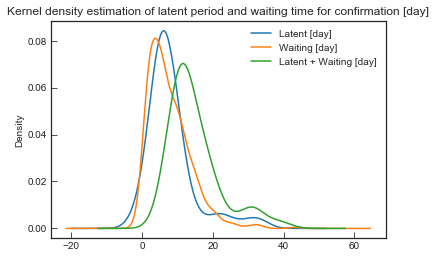

,count,mean,std,min,25%,50%,75%,max
Latent [day],83.0,8.180723,6.786185,-2.0,4.0,6.0,9.0,34.0
Waiting [day],563.0,7.682060,5.890473,0.0,3.0,6.0,11.0,43.0
Latent + Waiting [day],83.0,14.819277,7.305435,5.0,10.0,13.0,17.5,40.0


In [5]:
cols = ["Latent [day]", "Waiting [day]", "Latent + Waiting [day]"]
period_df[cols].plot.kde()
plt.title("Kernel density estimation of latent period and waiting time for confirmation [day]")
plt.show()
period_df[cols].describe().T

In [6]:
latent_period = period_df["Latent [min]"].median()
waiting_time = period_df["Waiting [min]"].median()
latent_waiting_day = period_df["Latent + Waiting [day]"].median()
latent_waiting_day

13.0